<a href="https://colab.research.google.com/github/afnanhabib787/Artificial-Intelligence/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Word-level one-hot encoding (toy example)

In [4]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
token_index = {}
for sample in samples:
  for word in sample.split():
    if word not in token_index:
      token_index[word] = len(token_index) + 1
max_length = 10
results = np.zeros(shape=(len(samples),
                          max_length,
                          max(token_index.values()) + 1))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word)
    results[i, j, index] = 1.

In [5]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [6]:
#Using Keras for word-level one-hot encoding

In [7]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [8]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [9]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [10]:
word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

In [1]:
#Listing 6.4 Word-level one-hot encoding with hashing trick (toy example)

In [3]:
import numpy as np
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
dimensionality = 1000
max_length = 10
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1.

In [4]:
results.shape

(2, 10, 1000)

In [5]:
abs(hash('abx'))

4956431528818027816

In [6]:
abs(hash('the')) % max_length

8

In [7]:
#Listing 6.5 Instantiating an Embedding layer

In [8]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [10]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=32,
          validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 6s 4ms/step - loss: 0.6665 - acc: 0.6285 - val_loss: 0.6148 - val_acc: 0.6950
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5379 - acc: 0.7512 - val_loss: 0.5274 - val_acc: 0.7322
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4607 - acc: 0.7876 - val_loss: 0.5017 - val_acc: 0.7438
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.4220 - acc: 0.8078 - val_loss: 0.4955 - val_acc: 0.7528
Epoch 5/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3955 - acc: 0.8235 - val_loss: 0.4962 - val_acc: 0.7554
Epoch 6/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3740 - acc: 0.8333 - val_loss: 0.4999 - val_acc: 0.7576
Epoch 7/10
625/625 [==============================] - 2s 4ms/step - loss: 0.3549 - acc: 0.8454 - val_loss: 0.5030 - val_acc: 0.7566
Epoch 8/10
625/625 [==============================] - 2s 4ms/step - loss: 0.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving aclImdb.zip to aclImdb.zip


In [ ]:
!unzip '/content/aclImdb.zip'

In [4]:
import os
imdb_dir = '/content/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

In [9]:
labels[:4]
texts[:2]

['In the future of 1985, a governmental committee headed by Howard Hesseman, is holding hearings on TV\'s first uncensored network. They sample it\'s programming, that play as a series of skits. I can name the good \'skit\' movies on one hand, not using my thumb. "Amazon Women on the Moon", "Kentucky Fried Movie", "The Meaning of Life", and "Mr. Mike\'s Mondo Video". Notice how I didn\'t mention "Tunnel Vision"? The reason for that is that this \'movie\' is death in cinematic form. None of the skits are even remotely funny, or even the least bit clever. It takes some sort of great ineptitude on the film makers\' part to not even get one laugh out of me.<br /><br />My Grade: F <br /><br />Eye Candy: Dody Dorn goes full frontal',
 "Alfred Hitchcok is not my favorite director by any means but imagine what he could have done with this! The plot holds much potential for suspense. John Garfield is as almost always excellent and Raymond Massey is scarily cast against type. Nancy Coleman is no

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [12]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 88582 unique tokens


In [ ]:
word_index

In [14]:
data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)


In [16]:
labels


array([0, 0, 0, ..., 1, 1, 1])

In [17]:
print('Shape of data tensor', data.shape)

Shape of data tensor (25000, 100)


In [18]:
print('Shape of label tensor', labels.shape)

Shape of label tensor (25000,)


In [20]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]

x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]


In [22]:
embedding_dim = 100


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 4s 138ms/step - loss: 0.6903 - acc: 0.5000 - val_loss: 0.6920 - val_acc: 0.5238
Epoch 2/10
7/7 [==============================] - 1s 103ms/step - loss: 0.5230 - acc: 0.9700 - val_loss: 0.6943 - val_acc: 0.5107
Epoch 3/10
7/7 [==============================] - 1s 112ms/step - loss: 0.3255 - acc: 1.0000 - val_loss: 0.6988 - val_acc: 0.5236
Epoch 4/10
7/7 [==============================] - 1s 111ms/step - loss: 0.1563 - acc: 1.0000 - val_loss: 0.7110 - val_acc: 0.5230
Epoch 5/10
7/7 [==============================] - 1s 97ms/step - loss: 0.0759 - acc: 1.0000 - val_loss: 0.7172 - val_acc: 0.5268
Epoch 6/10
7/7 [==============================] - 1s 111ms/step - loss: 0.0395 - acc: 1.0000 - val_loss: 0.7067 - val_acc: 0.5323
Epoch 7/10
7/7 [==============================] - 1s 101ms/step - loss: 0.0212 - acc: 1.0000 - val_loss: 0.7275 - val_acc: 0.5310
Epoch 8/10
7/7 [==============================] - 1s 103ms/step - loss: 0.0124 - acc: 1.000

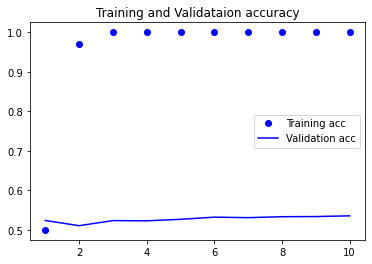

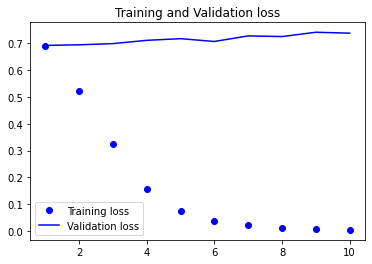

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [30]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(test_dir, label_type)
  for fname in sorted(os.listdir(dir_name)):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)

x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [31]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7419 - acc: 0.5300


[0.7418707013130188, 0.5300400257110596]

In [34]:
# RNN
from tensorflow.keras.layers import SimpleRNN

In [36]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                4256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 6s 735ms/step - loss: 0.6939 - acc: 0.5600 - val_loss: 0.7017 - val_acc: 0.5103
Epoch 2/10
7/7 [==============================] - 4s 700ms/step - loss: 0.4463 - acc: 0.9600 - val_loss: 0.6990 - val_acc: 0.5209
Epoch 3/10
7/7 [==============================] - 4s 682ms/step - loss: 0.2695 - acc: 1.0000 - val_loss: 0.7041 - val_acc: 0.5290
Epoch 4/10
7/7 [==============================] - 4s 698ms/step - loss: 0.1531 - acc: 1.0000 - val_loss: 0.7106 - val_acc: 0.5370
Epoch 5/10
7/7 [==============================] - 4s 673ms/step - loss: 0.0989 - acc: 1.0000 - val_loss: 0.7308 - val_acc: 0.5338
Epoch 6/10
7/7 [==============================] - 4s 669ms/step - loss: 0.0685 - acc: 1.0000 - val_loss: 0.7375 - val_acc: 0.5346
Epoch 7/10
7/7 [==============================] - 4s 717ms/step - loss: 0.0506 - acc: 1.0000 - val_loss: 0.7574 - val_acc: 0.5321
Epoch 8/10
7/7 [==============================] - 4s 708ms/step - loss: 0.0398 - acc: 1.00

In [38]:
#LSTM
from tensorflow.keras.layers import LSTM


In [42]:
x_train.shape

(200, 100)

In [39]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 7s 453ms/step - loss: 0.6925 - acc: 0.4900 - val_loss: 0.6920 - val_acc: 0.5021
Epoch 2/10
7/7 [==============================] - 2s 378ms/step - loss: 0.6754 - acc: 0.5800 - val_loss: 0.6899 - val_acc: 0.5073
Epoch 3/10
7/7 [==============================] - 2s 378ms/step - loss: 0.6361 - acc: 0.5950 - val_loss: 0.7025 - val_acc: 0.5037
Epoch 4/10
7/7 [==============================] - 2s 381ms/step - loss: 0.6297 - acc: 0.6950 - val_loss: 0.6633 - val_acc: 0.6041
Epoch 5/10
7/7 [==============================] - 2s 373ms/step - loss: 0.4027 - acc: 0.9350 - val_loss: 0.6582 - val_acc: 0.6045
Epoch 6/10
7/7 [==============================] - 2s 378ms/step - loss: 0.3074 - acc: 0.9850 - val_loss: 0.6723 - val_acc: 0.6320
Epoch 7/10
7/7 [==============================] - 2s 382ms/step - loss: 0.2328 - acc: 1.0000 - val_loss: 0.7553 - val_acc: 0.6581
Epoch 8/10
7/7 [==============================] - 2s 377ms/step - loss: 0.1971 - acc: 1.00

In [41]:
#GRU
from tensorflow.keras import layers

In [43]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.GRU(32, input_shape=(x_train.shape)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
gru (GRU)                    (None, 32)                12864     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,012,897
Trainable params: 1,012,897
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
7/7 [==============================] - 5s 442ms/step - loss: 0.0162 - acc: 0.9950 - val_loss: 1.5806 - val_acc: 0.6523
Epoch 2/10
7/7 [==============================] - 2s 372ms/step - loss: 2.5487e-04 - acc: 1.0000 - val_loss: 1.5874 - val_acc: 0.6506
Epoch 3/10
7/7 [==============================] - 2s 373ms/step - loss: 2.2801e-04 - acc: 1.0000 - val_loss: 1.6036 - val_acc: 0.6488
Epoch 4/10
7/7 [==============================] - 2s 371ms/step - loss: 2.0571e-04 - acc: 1.0000 - val_loss: 1.6209 - val_acc: 0.6490
Epoch 5/10
7/7 [==============================] - 2s 370ms/step - loss: 1.8338e-04 - acc: 1.0000 - val_loss: 1.6505 - val_acc: 0.6476
Epoch 6/10
7/7 [==============================] - 2s 370ms/step - loss: 1.6174e-04 - acc: 1.0000 - val_loss: 1.6864 - val_acc: 0.6490
Epoch 7/10
7/7 [==============================] - 2s 369ms/step - loss: 1.4124e-04 - acc: 1.0000 - val_loss: 1.7224 - val_acc: 0.6491
Epoch 8/10
7/7 [==============================] - 2s 371ms/step - 

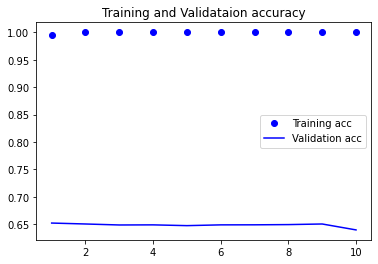

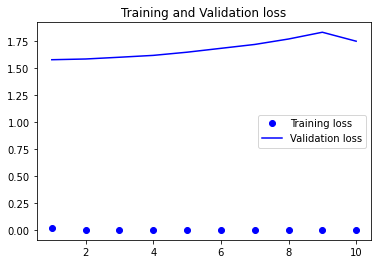

In [48]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validataion accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()